## 数据导入

In [10]:
plt.rcParams['figure.figsize'] = (12, 6) # 设置figure_size尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [215]:
data=pd.read_csv('./y_c.csv',header=0,usecols=[1,2,3],index_col=0)
data.head()

<IPython.core.display.Javascript object>

,income,consumpton
name,,
郭一,1300,1000
徐二,1700,2000
张三,800,1200
李四,2100,2000
王五,1200,800


In [212]:
dat=pd.read_csv('./C_Y.csv',header=0,usecols=[1,2,3],index_col='时间',)
dat.head()

<IPython.core.display.Javascript object>

,人均消费,可支配收入
时间,,
1989,913,1050
1990,982,1155
1991,1200,1305
1992,1346,1504
1993,1563,1902


In [204]:
df=pd.read_excel('./lvyou.xlsx',index_col="地区")
df.head()

<IPython.core.display.Javascript object>

,旅游人数 (万人次）,AAAA 级 旅游区数,旅馆房间数,旅社从业人数
地区,,,,
北京,11000.00,17,112270,389311
上海,8254.00,6,50866,185813
山东,8085.96,11,36712,333569
江苏,8074.00,15,50089,373960
广东,7191.83,13,64975,848600


In [76]:
df.dtypes

旅游人数 (万人次）     float64
AAAA 级 旅游区数      int64
旅馆房间数            int64
旅社从业人数           int64
dtype: object

In [64]:
df.dtypes

dtype('int64')

In [77]:
df.describe()

,旅游人数 (万人次）,AAAA 级 旅游区数,旅馆房间数,旅社从业人数
count,31.000000,31.000000,31.000000,31.000000
mean,4107.354839,7.000000,26330.967742,192438.419355
std,2747.499461,4.115013,23080.013691,167484.604504
min,55.900000,2.000000,1808.000000,8779.000000
25%,2162.620000,3.000000,11651.000000,85256.500000
50%,3510.370000,6.000000,18945.000000,165684.000000
75%,5839.100000,9.500000,30806.500000,258131.500000
max,11000.000000,17.000000,112270.000000,848600.000000


<IPython.core.display.Javascript object>

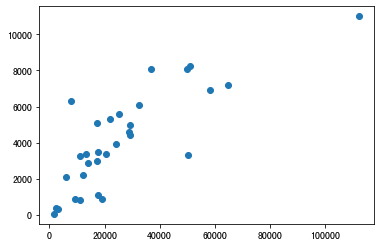

In [79]:
plt.scatter(df.iloc[:,2],df.iloc[:,0])

<IPython.core.display.Javascript object>

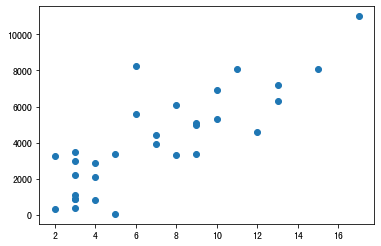

In [80]:
plt.scatter(df.iloc[:,1],df.iloc[:,0])

<IPython.core.display.Javascript object>

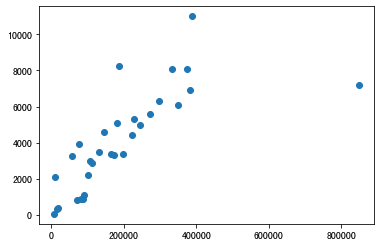

In [81]:
plt.scatter(df.iloc[:,3],df.iloc[:,0])

In [86]:
import statsmodels.api as sm
def regress(data, yvar, xvars):     
    data=pd.concat([data[yvar], data[xvars]], axis=1).dropna(axis=0)
    Y = data[yvar]     
    x = data[xvars] 
    X = sm.add_constant(x)
    result = sm.OLS(Y, X).fit()     
    return result.summary()
#     return yvar,result.params[1]
#     print('{}的beta为：{}'.format(yvar,result.params[1]))

In [87]:
regress(df,'旅游人数 (万人次）',['AAAA 级 旅游区数','旅馆房间数','旅社从业人数'])

<IPython.core.display.Javascript object>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             旅游人数 (万人次）   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     33.61
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.92e-09
Time:                        21:52:49   Log-Likelihood:                -264.85
No. Observations:                  31   AIC:                             537.7
Df Residuals:                      27   BIC:                             543.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         365.2388    478.744      0.763      0.452    -617.063    1347.540
AAAA 级 旅游区数   288.9314     94.814      3.047      0.005      94.388     483.474
旅馆房间数           0.0462      0.016      2.870      0.008       0.013       0.079
旅社从业人数          0.0026      0.002      1.147      0.262      -0.002       0.007
==============================================================================
Omnibus:                        1.116   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.620
Skew:                           0.346   Prob(JB):                        0.734
Kurtosis:                       3.030   Cond. No.                     5.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
hs_index=ts.get_hist_data('hs300') #一次性获取"工业行业指数"全部日k线数据
hs_index

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2020-05-21,3950.60,3951.74,3913.79,3907.58,948610.31,-21.43,-0.55,3928.198,3941.850,3900.266,990175.24,1009675.99,1040274.09
2020-05-20,3955.71,3955.71,3935.22,3923.92,1007911.50,-21.03,-0.53,3930.484,3942.960,3897.250,977513.19,1020329.61,1042850.13
2020-05-19,3963.78,3966.85,3956.25,3944.07,940152.94,33.34,0.85,3937.090,3943.063,3892.463,952312.22,1059394.13,1058456.70
2020-05-18,3914.66,3946.43,3922.91,3898.40,1128017.62,10.09,0.26,3937.888,3938.696,3884.770,960782.75,1098295.96,1059423.04
2020-05-15,3941.13,3945.20,3912.82,3907.40,926183.81,-12.40,-0.32,3945.342,3933.108,3878.492,980526.82,1081348.79,1057253.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-27,4088.93,4088.93,4049.95,4037.15,1434552.62,-54.25,-1.32,4140.364,4140.364,4140.364,1638576.70,1638576.70,1638576.70
2017-11-24,4089.47,4116.59,4104.20,4057.49,1308580.38,1.80,0.04,4162.968,4162.968,4162.968,1689582.72,1689582.72,1689582.72
2017-11-23,4213.38,4214.19,4102.40,4086.90,1781472.25,-125.17,-2.96,4182.557,4182.557,4182.557,1816583.50,1816583.50,1816583.50


In [93]:
import tushare as ts

gy_index=ts.get_hist_data('sh000004') #一次性获取"工业行业指数"全部日k线数据
gy_index

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2020-05-21,2399.56,2401.83,2380.78,2376.42,1307536.00,-12.46,-0.52,2390.210,2389.652,2356.098,1333494.75,1313838.48,1376819.38
2020-05-20,2409.50,2410.33,2393.24,2386.02,1369069.75,-17.56,-0.73,2389.784,2388.360,2353.645,1324301.20,1325922.75,1377537.71
2020-05-19,2405.75,2411.34,2410.80,2398.36,1279404.12,22.76,0.95,2390.958,2385.804,2349.806,1289010.23,1338856.85,1384007.91
2020-05-18,2384.77,2403.46,2388.04,2375.39,1495439.00,9.85,0.41,2387.338,2377.631,2344.383,1284535.40,1353268.80,1381721.95
2020-05-15,2387.12,2390.00,2378.19,2370.99,1216024.88,-0.46,-0.02,2387.316,2367.964,2339.763,1266302.88,1325546.81,1372451.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-27,2637.68,2639.67,2614.79,2611.48,909331.19,-26.42,-1.00,2657.700,2657.700,2657.700,1002274.51,1002274.51,1002274.51
2017-11-24,2625.44,2647.10,2641.21,2619.07,891863.81,4.93,0.19,2668.428,2668.428,2668.428,1025510.35,1025510.35,1025510.35
2017-11-23,2699.75,2699.75,2636.28,2634.99,1155797.88,-68.02,-2.52,2677.500,2677.500,2677.500,1070059.19,1070059.19,1070059.19


<IPython.core.display.Javascript object>

Text(0.5, 0, '时间')

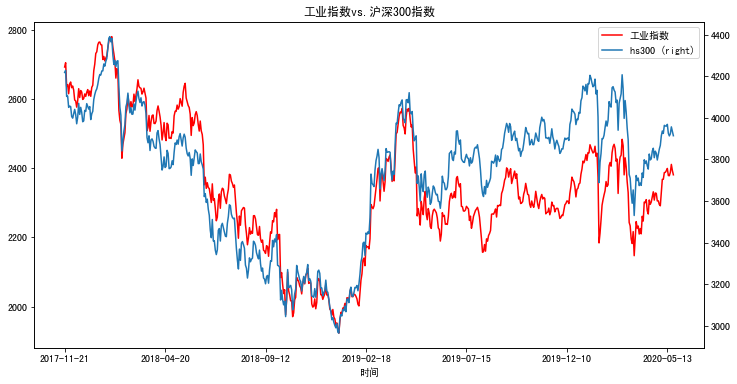

In [153]:
#ax=ax,secondary_y=True
fig=plt.figure(figsize=(12,6))
ax=gy_index.close[::-1].plot(legend='best',style='r-',label='工业指数')
hs_index.close[::-1].plot(secondary_y=True,ax=ax,legend='best',label='hs300')
ax.set_title('工业指数vs.沪深300指数')
ax.set_xlabel('时间')
# ax.set_xlim(['2017-11-21', '2020-05-21'])
# ticks = ax.set_xticks(pd.date_range(start='2017-11',end='2020-5',periods=6))
# labels = ax.set_xticklabels(['2017-11', '2018-04', '2018-09','2019-02', '2019-07', '2020-05'],rotation=30, fontsize='small')


## 时间序列分析

AIC(Akaike information criterion，赤池信息度量准则
AIC=2k-2ln(L)

BIC(Bayesian information criterion，贝叶斯信息度量准则
BIC=kln(n)-2ln(L)

In [12]:
import tushare as tu

ts=pd.DataFrame(tu.get_hist_data('hs300').close)
ts.head()

<IPython.core.display.Javascript object>

,close
date,
2020-06-05,4001.25
2020-06-04,3982.19
2020-06-03,3983.65
2020-06-02,3983.57
2020-06-01,3971.34


In [30]:
ts.to_excel('./hs300.xlsx')

<IPython.core.display.Javascript object>

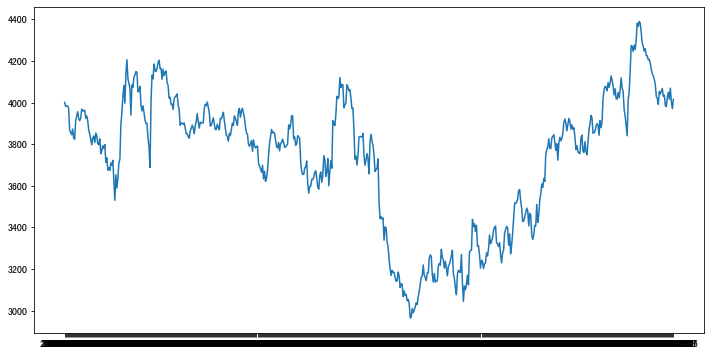

In [13]:
# ts = data['#Passengers']
plt.plot(ts)

### 稳定性检测

平稳性检验的目的是为了判断序列是否平稳，如果不平稳，需要采取一定的措施进行平稳性处理，常见的方法是差分，我们需要选择合适的差分阶数。只要能够通过 1% 显著性检测，差分阶数就是合理的，我们希望阶数越小越好。

绘制滚动统计：我们可以绘制移动平均数和移动方差，观察它是否随着时间变化。

In [14]:
def rolling_statistics(timeseries):#绘制滚动统计：我们可以绘制移动平均数和移动方差，观察它是否随着时间变化
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig=plt.figure(figsize=(12,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [15]:
ts.rolling(window=12).mean()

,close
date,
2020-06-05,NaN
2020-06-04,NaN
2020-06-03,NaN
2020-06-02,NaN
2020-06-01,NaN
...,...
2017-12-12,4027.754167
2017-12-11,4034.278333
2017-12-08,4030.091667


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

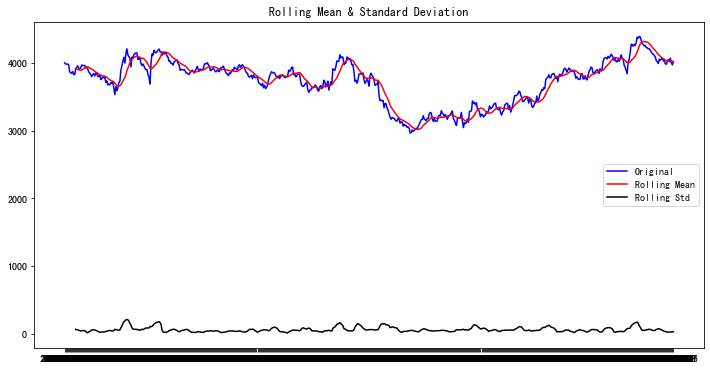

In [16]:
rolling_statistics(ts)

ADF 检验：这是一种检查数据稳定性的统计测试。无效假设：时间序列是不稳定的。测试结果由测试统计量和一些置信区间的临界值组成。如果 “测试统计量” 少于“临界值”，我们可以拒绝无效假设，并认为序列是稳定的。或者根据前面提高的 p 值检验，如果 p 值小于显著性水平，我们可以拒绝无效假设，认为序列稳定。

In [17]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    rolling_statistics(timeseries)#绘图
    print ('Results of Augment Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

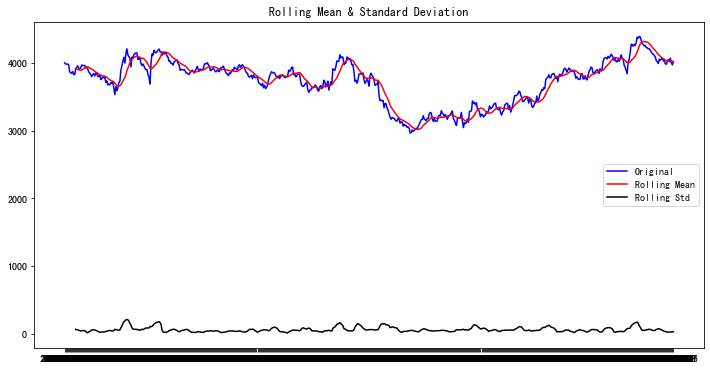

Results of Augment Dickey-Fuller Test:


<IPython.core.display.Javascript object>

Test Statistic                  -1.774279
p-value                          0.393304
#Lags Used                       7.000000
Number of Observations Used    599.000000
Critical Value (1%)             -3.441314
Critical Value (5%)             -2.866377
Critical Value (10%)            -2.569346
dtype: float64


In [18]:
adf_test(ts)

- Test statistic：代表检验统计量
- p-value：代表p值检验的概率
- Lags used：使用的滞后k，autolag=AIC时会自动选择滞后
- Number of Observations Used：样本数量
- Critical Value(5%) : 显著性水平为5%的临界值。

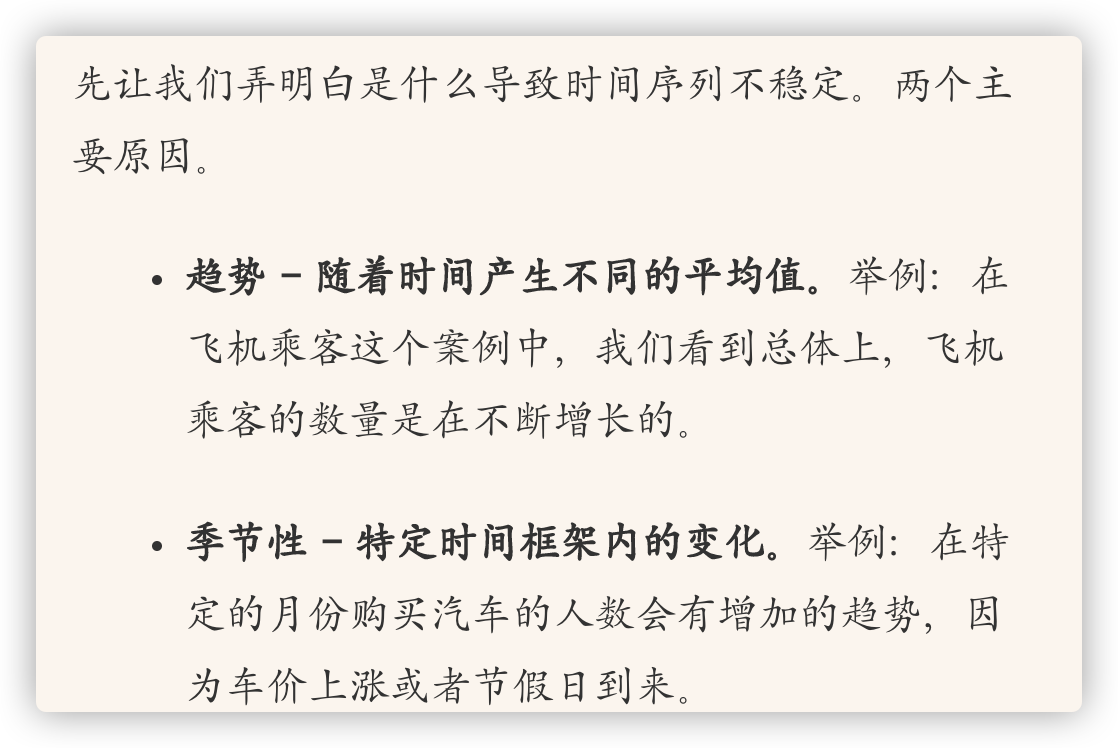

### 平稳性处理

基本原理是，通过建模并估计趋势和季节性这些因素，并从时间序列中移除，来获得一个稳定的时间序列，然后再使用统计预测技术来处理时间序列

消除趋势的第一个方法是转换。

对数变换

<IPython.core.display.Javascript object>

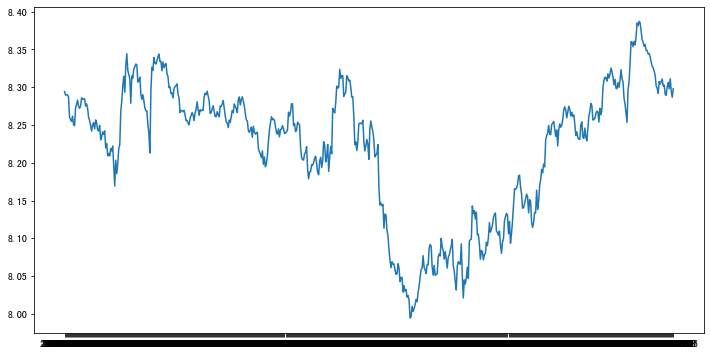

In [19]:
ts_log = np.log(ts)
plt.plot(ts_log)

可以使用一些技术来对这个趋势建模, 然后将它从序列中删除。最常用的方法有:

- 平滑 - 取滚动平均数
- 差分
- 分解

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

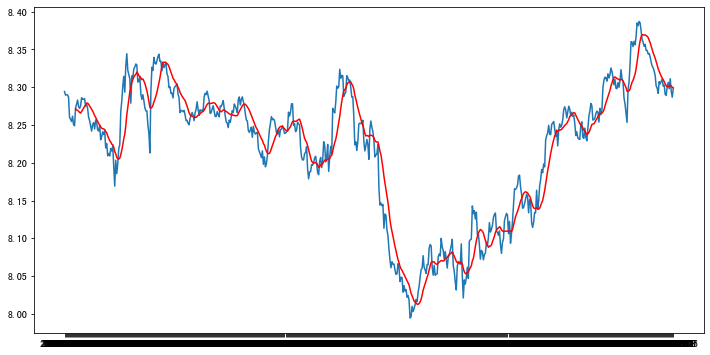

In [20]:
moving_avg = ts_log.rolling(12).mean()#移动平均数
fig=plt.figure(figsize=(12,6))
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

In [21]:
#做差：减去趋势部分
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

,close
date,
2020-06-05,NaN
2020-06-04,NaN
2020-06-03,NaN
2020-06-02,NaN
2020-06-01,NaN
2020-05-29,NaN
2020-05-28,NaN
2020-05-27,NaN
2020-05-26,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

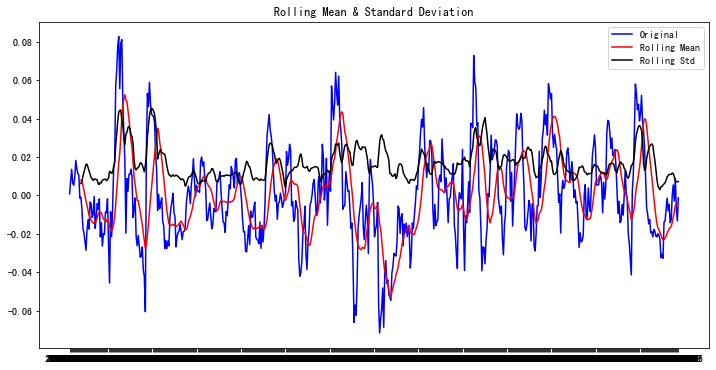

Results of Augment Dickey-Fuller Test:


<IPython.core.display.Javascript object>

Test Statistic                -7.058471e+00
p-value                        5.299123e-10
#Lags Used                     7.000000e+00
Number of Observations Used    5.880000e+02
Critical Value (1%)           -3.441520e+00
Critical Value (5%)           -2.866468e+00
Critical Value (10%)          -2.569394e+00
dtype: float64


In [22]:
adf_test(ts_log_moving_avg_diff[11:])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

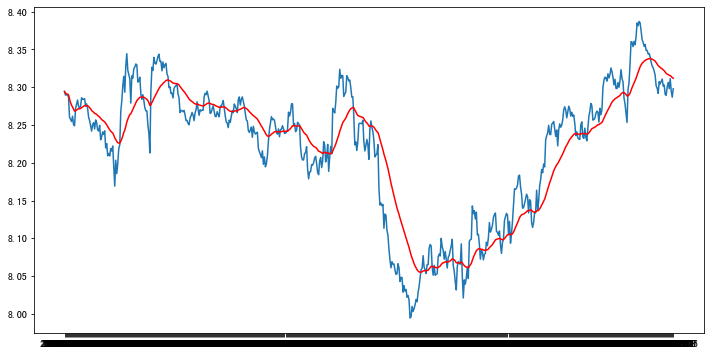

In [23]:
# 指数加权移动平均

expwighted_avg=ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

这里采用指数加权移动平均方法，会对当前的数据加大权重，对过去的数据减小权重。

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

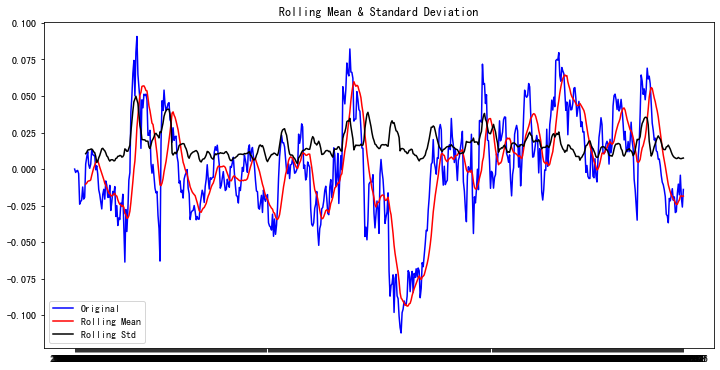

Results of Augment Dickey-Fuller Test:


<IPython.core.display.Javascript object>

Test Statistic                  -4.204269
p-value                          0.000648
#Lags Used                       7.000000
Number of Observations Used    599.000000
Critical Value (1%)             -3.441314
Critical Value (5%)             -2.866377
Critical Value (10%)            -2.569346
dtype: float64


In [24]:
#做差
ts_log_ewma_diff = ts_log - expwighted_avg
adf_test(ts_log_ewma_diff)

<IPython.core.display.Javascript object>

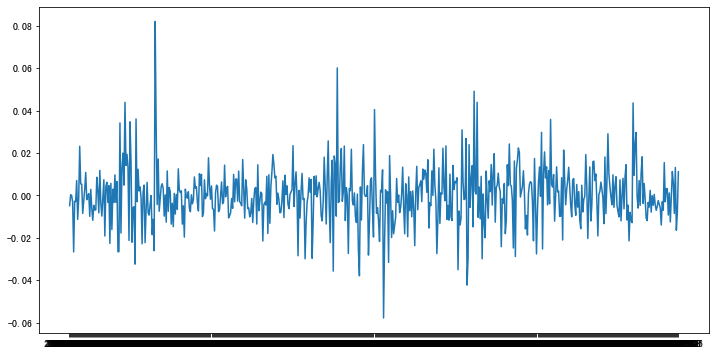

In [25]:
#步长为1的一阶差分
ts_log_diff = ts_log - ts_log.shift(periods=1)
plt.plot(ts_log_diff)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

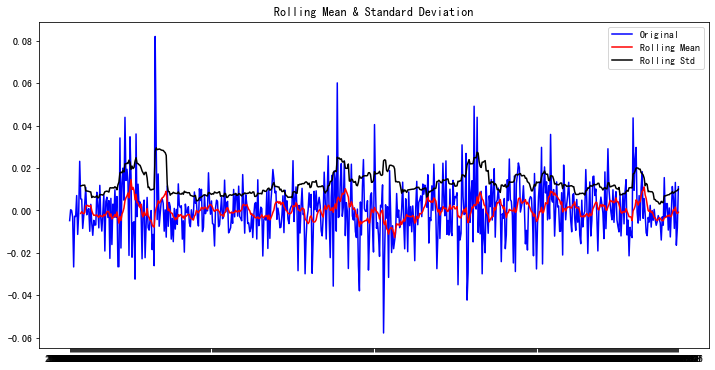

Results of Augment Dickey-Fuller Test:


<IPython.core.display.Javascript object>

Test Statistic                -9.423659e+00
p-value                        5.418595e-16
#Lags Used                     6.000000e+00
Number of Observations Used    5.990000e+02
Critical Value (1%)           -3.441314e+00
Critical Value (5%)           -2.866377e+00
Critical Value (10%)          -2.569346e+00
dtype: float64


In [26]:
#只通过了10%的检验
ts_log_diff.dropna(inplace=True)
adf_test(ts_log_diff)

<IPython.core.display.Javascript object>

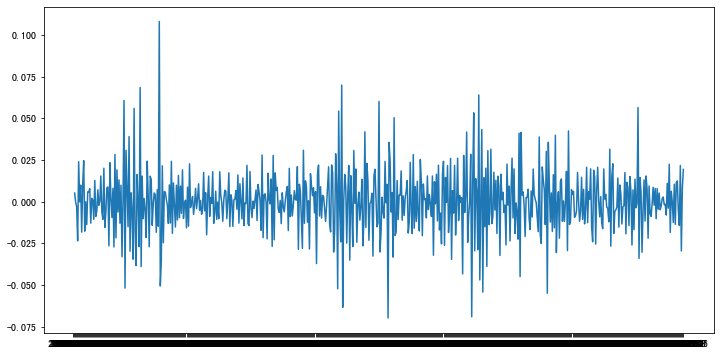

In [27]:
#一阶差分：Y(k)=X(k+1)-X(k)
#二阶差分：Y(k)的一阶差分Z(k)=Y(k+1)-Y(k)=X(k+2)-2*X(k+1)+X(k)为此函数的二阶差分
ts_log_diff = ts_log - ts_log.shift(periods=1)
ts_log_diff2 = ts_log_diff - ts_log_diff.shift(periods=1)
plt.plot(ts_log_diff2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

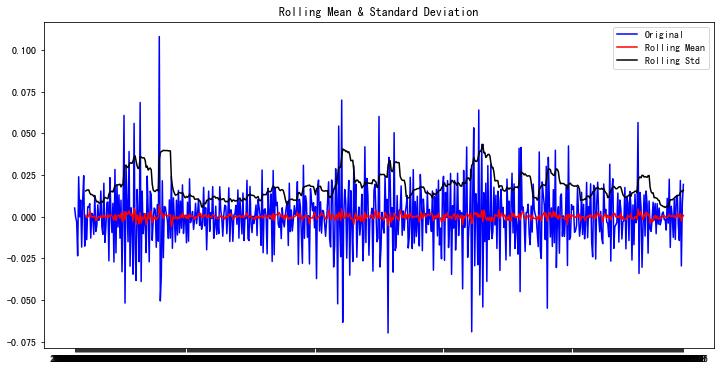

Results of Augment Dickey-Fuller Test:


<IPython.core.display.Javascript object>

Test Statistic                -9.463272e+00
p-value                        4.296661e-16
#Lags Used                     1.800000e+01
Number of Observations Used    5.860000e+02
Critical Value (1%)           -3.441558e+00
Critical Value (5%)           -2.866485e+00
Critical Value (10%)          -2.569403e+00
dtype: float64


In [28]:
# 二阶差分检验
#可以看到，二阶差分，p值非常小，小于1%，检验统计量也明显小于%1的临界值。因此认定为很平稳
ts_log_diff2.dropna(inplace=True)
adf_test(ts_log_diff2)

对二阶差分进行 adf 检验, 可以看到，二阶差分，p 值非常小，小于 1%，检验统计量也明显小于 %1 的临界值。因此认定为很平稳.

In [34]:
ts=pd.read_excel('./hs300.xlsx',parse_dates=True,index_col='date')
ts.head()

<IPython.core.display.Javascript object>

,close
date,
2020-06-05,4001.25
2020-06-04,3982.19
2020-06-03,3983.65
2020-06-02,3983.57
2020-06-01,3971.34


In [35]:
ts_log=np.log(ts)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

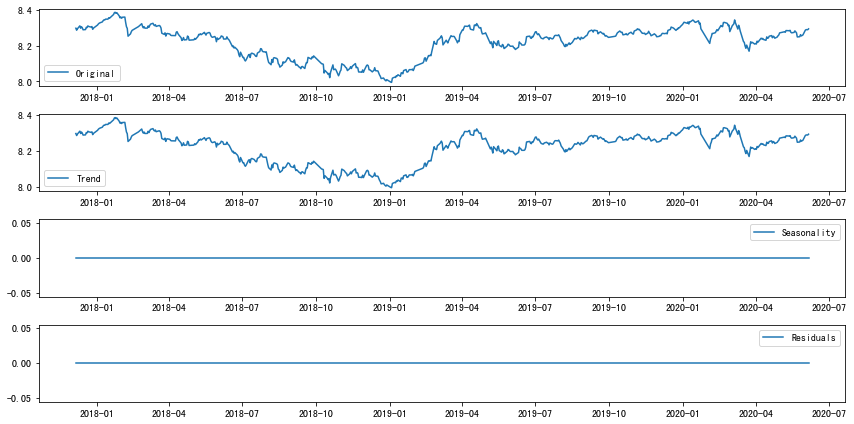

In [38]:
#时间序列分解
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413);
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

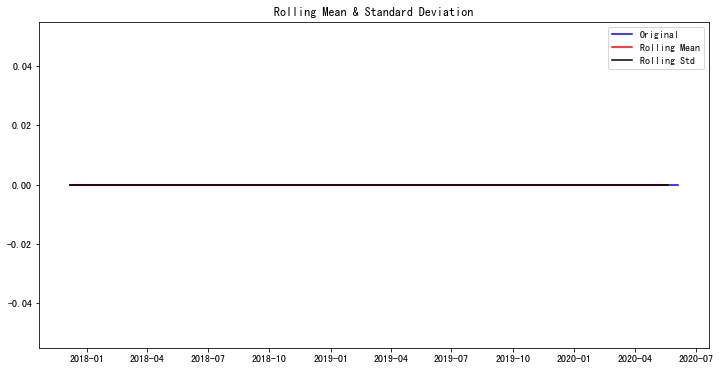

Results of Augment Dickey-Fuller Test:


/Users/mac/.pyenv/versions/3.7.3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/mac/.pyenv/versions/3.7.3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<IPython.core.display.Javascript object>

Test Statistic                        NaN
p-value                               NaN
#Lags Used                       0.000000
Number of Observations Used    606.000000
Critical Value (1%)             -3.441187
Critical Value (5%)             -2.866321
Critical Value (10%)            -2.569316
dtype: float64


In [39]:
#对残差进行ADF检验
#可以发现序列非常平稳
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
adf_test(ts_log_decompose)

### 自相关图和偏自相关图

自相关系数ACF

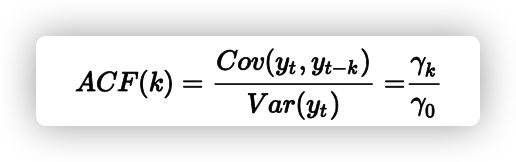

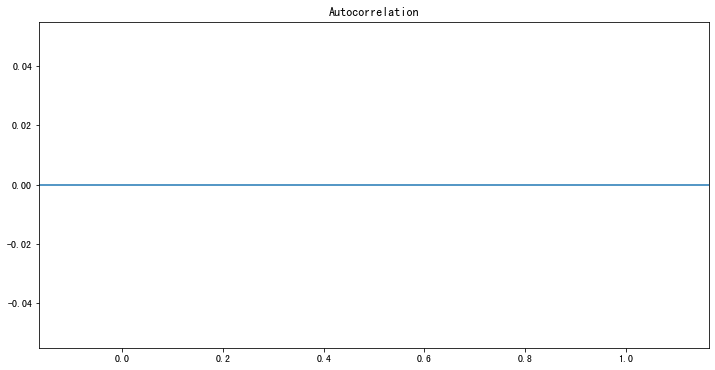

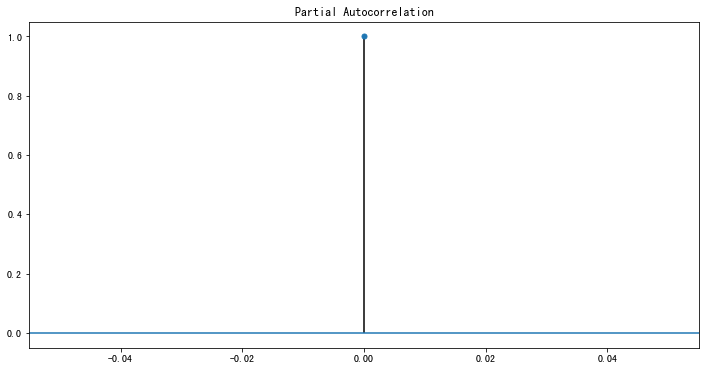

In [40]:
import statsmodels.api as sm
def acf_pacf_plot(ts_log_diff):
    sm.graphics.tsa.plot_acf(ts_log_diff,lags=10) #ARIMA,q
    sm.graphics.tsa.plot_pacf(ts_log_diff,lags=20) #ARIMA,p
acf_pacf_plot(ts_log_diff) #调用一阶差分

In [94]:
# 差分操作,d代表差分序列，比如[1,1,1]可以代表3阶差分。  [12,1]可以代表第一次差分偏移量是12，第二次差分偏移量是1
def diff_ts(ts, d):
    global shift_ts_list
    #  动态预测第二日的值时所需要的差分序列
    global last_data_shift_list #这个序列在恢复过程中需要用到
    shift_ts_list = []
    last_data_shift_list = []
    tmp_ts = ts
    for i in d:
        last_data_shift_list.append(tmp_ts[-i])
        print (last_data_shift_list)
        shift_ts = tmp_ts.shift(i)
        shift_ts_list.append(shift_ts)
        tmp_ts = tmp_ts - shift_ts
    tmp_ts.dropna(inplace=True)
    return tmp_ts

In [95]:
# 还原操作
def predict_diff_recover(predict_value, d):
    if isinstance(predict_value, float):
        tmp_data = predict_value
        for i in range(len(d)):
            tmp_data = tmp_data + last_data_shift_list[-i-1]
    elif isinstance(predict_value, np.ndarray):
        tmp_data = predict_value[0]
        for i in range(len(d)):
            tmp_data = tmp_data + last_data_shift_list[-i-1]
    else:
        tmp_data = predict_value
        for i in range(len(d)):
            try:
                tmp_data = tmp_data.add(shift_ts_list[-i-1])
            except:
                raise ValueError('What you input is not pd.Series type!')
        tmp_data.dropna(inplace=True)
    return tmp_data # return np.exp(tmp_data)也可以return到最原始，tmp_data是对原始数据取对数的结果


In [96]:
d=[1, 1] # 定义差分序列
ts_log = np.log(ts)
diffed_ts = diff_ts(ts_log, d) 
model = arima_model(diffed_ts)#构建模型
predict_ts = model.properModel.predict() #预测，这是对训练数据的预测
diff_recover_ts = predict_diff_recover(predict_ts, d)
log_recover = np.exp(diff_recover_ts) #恢复对数前数据，该数据可以和原始数据ts进行作图对比

[6.068425588244111]
[6.068425588244111, 0.10227884912041851]


NameError: name 'arima_model' is not defined

In [104]:
#注意这里面使用的ts_log_diff是经过合适阶数的差分之后的数据，上文中提到ARIMA该开源库，不支持3阶以上的#差分。所以我们需要提前将数据差分好再传入
import sys
from statsmodels.tsa.arima_model import ARMA
def _proper_model(ts_log_diff, maxLag):
    best_p = 0 
    best_q = 0
    best_bic = sys.maxsize
    best_model=None
    for p in np.arange(maxLag):
        for q in np.arange(maxLag):
            model = ARMA(ts_log_diff, order=(p, q))
            try:
                results_ARMA = model.fit(disp=-1)
            except:
                continue
            bic = results_ARMA.bic
            print (bic, best_bic)
            if bic < best_bic:
                best_p = p
                best_q = q
                best_bic = bic
                best_model = results_ARMA
    return best_p,best_q,best_model
_proper_model(ts_log_diff, 10) #对一阶差分求最优p和q

nan 9223372036854775807


(0, 0, None)

In [67]:
ts_log_diff

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: #Passengers, Length: 144, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'RSS:nan')

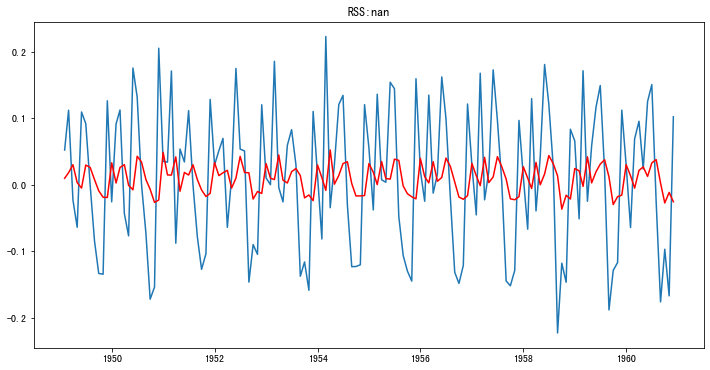

In [103]:
# AR模型，q=0
#RSS是残差平方和
# disp为-1代表不输出收敛过程的信息，True代表输出
model = ARIMA(ts_log,order=(1,1,0),freq=None) #第二个参数代表使用了一阶差分
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red') #红色线代表预测值
plt.title('RSS:%.4f' % sum((results_AR.fittedvalues-ts_log_diff)**2))#残差平方和

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'RSS: nan')

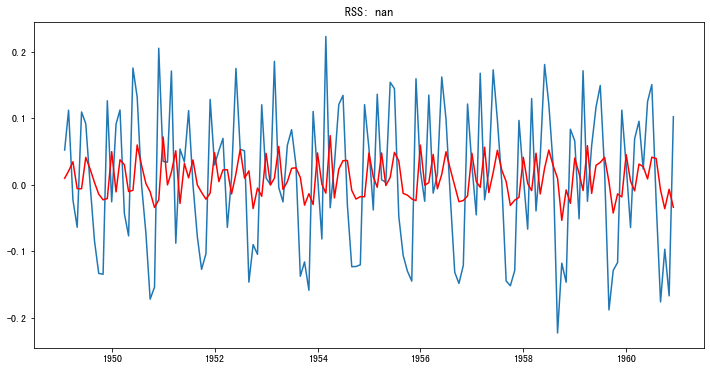

In [102]:
#MA模型 p=0
model = ARIMA(ts_log,order=(0,1,1))
results_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'RSS: nan')

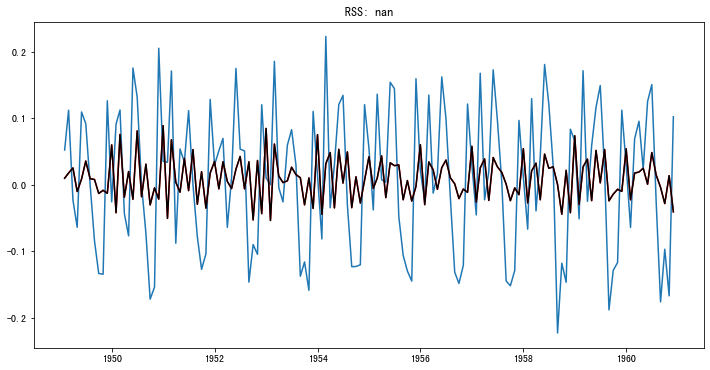

In [106]:
#ARIMA
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  #不展示信息
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')#和下面这句结果一样
plt.plot(results_ARIMA.predict(), color='black')#predict得到的就是fittedvalues，只是差分的结果而已。还需要继续回退
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


In [100]:
import warnings
warnings.filterwarnings("ignore")

In [108]:
_proper_model(ts_log_diff, 9)

nan 9223372036854775807


(0, 0, None)

In [121]:
ts_log_diff = diff_ts(ts_log, d=[1])#调用差分方法，方便后续还原
model = ARIMA(ts_log, order=(8, 1, 7))  #建模
results_ARIMA = model.fit(disp=-1)  #fit
predict_ts = model.predict(ts) #对训练数据进行预测

#还原
diff_recover_ts = predict_diff_recover(predict_ts, d=[1])#恢复数据
log_recover = np.exp(diff_recover_ts)#还原对数前数据

[6.068425588244111]


ValueError: could not broadcast input array from shape (0,1) into shape (7,1)

In [ ]:
#绘图
#ts = ts[log_recover.index]#排除空的数据
plt.plot(ts,color="blue",label='Original')
plt.plot(log_recover,color='red',label='Predicted')
plt.legend(loc='best')
# plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/len(ts)))#RMSE,残差平方和开根号，即标准差

In [111]:
# forecast方法会自动进行差分还原，当然仅限于支持的1阶和2阶差分
forecast_n = 12 #预测未来12个月走势
forecast_ARIMA_log = results_ARIMA.forecast(forecast_n)
forecast_ARIMA_log = forecast_ARIMA_log[0]
print (forecast_ARIMA_log)


[6.15175605 6.11069772 6.12123585 6.17404858 6.25701673 6.38966133
 6.55448608 6.47525126 6.34082661 6.25611336 6.13923844 6.1901015 ]


In [112]:
#定义获取连续时间，start是起始时间，limit是连续的天数,level可以是day,month,year
import arrow
def get_date_range(start, limit, level='month',format='YYYY-MM-DD'):
    start = arrow.get(start, format)  
    result=(list(map(lambda dt: dt.format(format) , arrow.Arrow.range(level, start, 		   limit=limit))))
    dateparse2 = lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')
    return map(dateparse2, result)

ModuleNotFoundError: No module named 'arrow'

## 股票分析

In [4]:
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt     
#tsa为Time Series analysis缩写
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

In [5]:
#画图
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
def ts_plot(data, lags=None,title=''):
    if not isinstance(data, pd.Series):   
        data = pd.Series(data)
    #matplotlib官方提供了五种不同的图形风格，
    #包括bmh、ggplot、dark_background、
    #fivethirtyeight和grayscale
    with plt.style.context('ggplot'):    
        fig = plt.figure(figsize=(10, 8))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0))
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        data.plot(ax=ts_ax)
        ts_ax.set_title(title+'时序图')
        smt.graphics.plot_acf(data, lags=lags,
              ax=acf_ax, alpha=0.5)
        acf_ax.set_title('自相关系数')
        smt.graphics.plot_pacf(data, lags=lags,
             ax=pacf_ax, alpha=0.5)
        pacf_ax.set_title('偏自相关系数')
        sm.qqplot(data, line='s', ax=qq_ax)
        qq_ax.set_title('QQ 图')        
        scs.probplot(data, sparams=(data.mean(), 
          data.std()), plot=pp_ax)
        pp_ax.set_title('PP 图') 
        plt.tight_layout()
    return

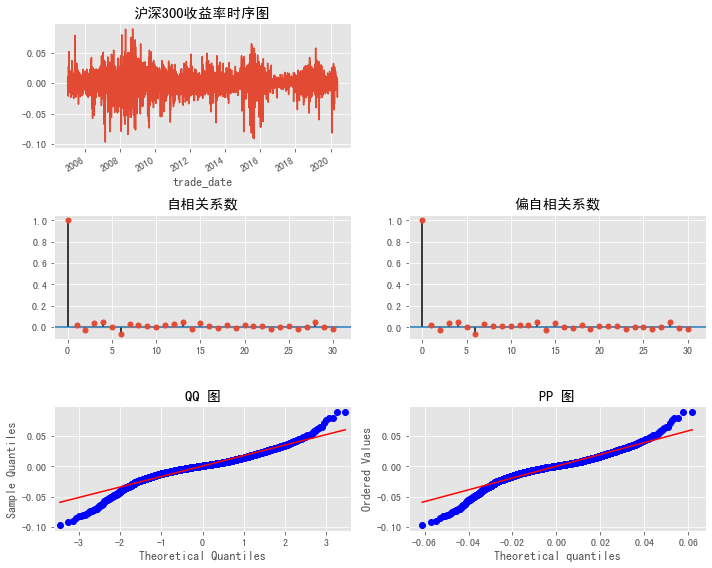

In [8]:
import tushare as ts
token='693c84c2aca4dc7b941439006bd946413706e7a9560bf3cce0369bb3'
pro = ts.pro_api(token)
df=pro.index_daily(ts_code='000300.SH')
df.index=pd.to_datetime(df.trade_date)
# del df.index.name
df=df.sort_index()
df['ret']=np.log(df.close/df.close.shift(1))
#df.head()
ts_plot(df.ret.dropna(),lags=30,title='沪深300收益率')

In [11]:
df.to_excel('./hs300.xlsx')

使用Python模拟ARCH模型并对沪深300收益率的ARCH效应进行统计检验。

### ARCH MODEL

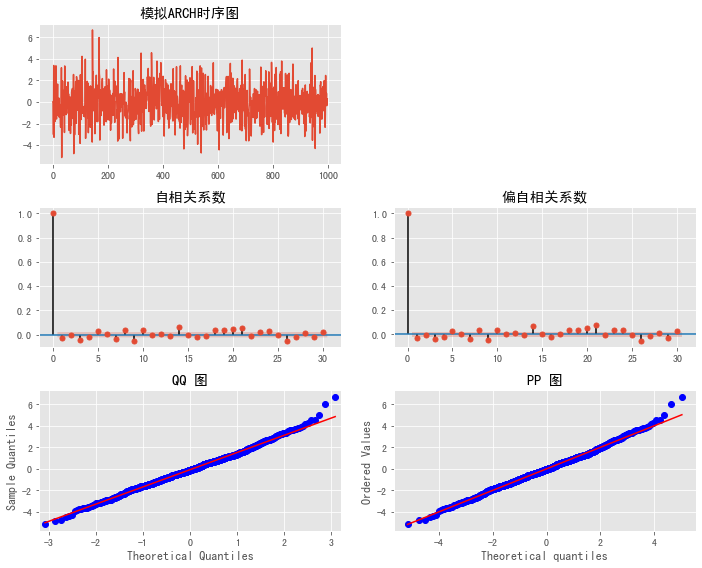

In [12]:
# 模拟ARCH时间序列
np.random.seed(2)
a0 = 2
a1 = .5
y = w = np.random.normal(size=1000)
Y = np.empty_like(y)
for t in range(1,len(y)):
    Y[t] = w[t] * np.sqrt((a0 + a1*y[t-1]**2))
ts_plot(Y, lags=30,title='模拟ARCH')

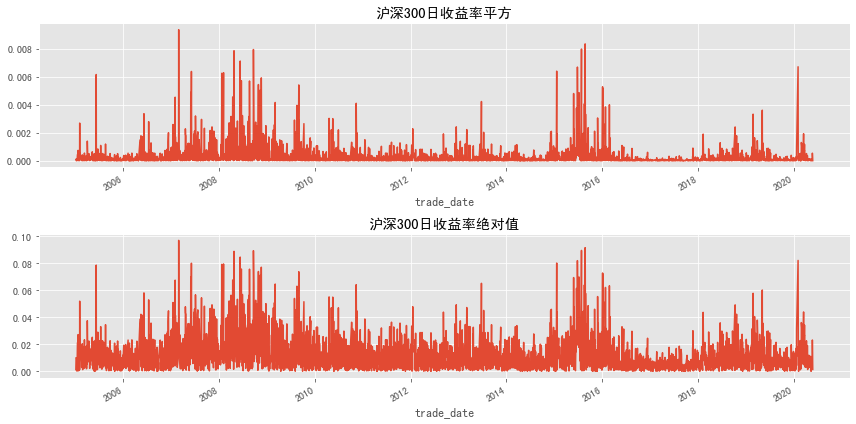

In [13]:
def ret_plot(ts, title=''):
    ts1=ts**2
    ts2=np.abs(ts)
    with plt.style.context('ggplot'):    
        fig = plt.figure(figsize=(12, 6))
        layout = (2, 1)
        ts1_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        ts2_ax = plt.subplot2grid(layout, (1, 0))
        ts1.plot(ax=ts1_ax)
        ts1_ax.set_title(title+'日收益率平方')
        ts2.plot(ax=ts2_ax)
        ts2_ax.set_title(title+'日收益率绝对值')
        plt.tight_layout()
    return

ret_plot(df.ret.dropna(), title='沪深300')

从沪深300的日收益平方和绝对值走势图可以看出，存在较明显的波动聚集的现象，初步可以判断出沪深300日收益序列存在ARCH效应。下面使用Ljung-Box统计量对收益率平方的自相关性进行统计检验。计算Q统计量和LB统计量都是用python中statsmodels模块acorr_ljungbox方法. 默认情况下, acorr_ljungbox只计算LB统计量, 只有当参数boxpierce=True时, 才会输出Q统计量。由LB白噪声检验可以看出，Q统计量的p值都在0.05以下, 表明原假设成立的概率极小, 可以拒绝沪深300收益率的平方是白噪音序列的原假设，说明原序列（沪深300收益率）存在ARCH效应。

/Users/mac/.pyenv/versions/3.7.3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:496: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)
/Users/mac/.pyenv/versions/3.7.3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


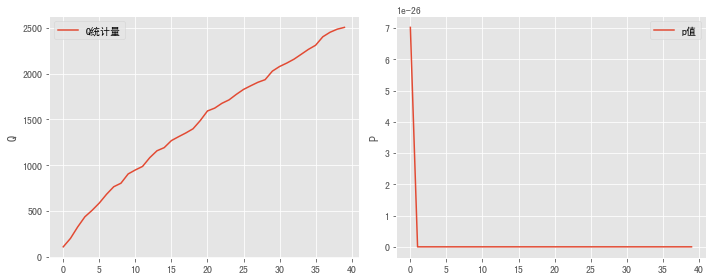

In [14]:
def whitenoise_test(ts):
    '''计算box pierce 和 box ljung统计量'''
    from statsmodels.stats.diagnostic import acorr_ljungbox
    q,p=acorr_ljungbox(ts)
    with plt.style.context('ggplot'):    
        fig = plt.figure(figsize=(10, 4))
        axes = fig.subplots(1,2)
        axes[0].plot(q, label='Q统计量')
        axes[0].set_ylabel('Q')
        axes[1].plot(p, label='p值')
        axes[1].set_ylabel('P')
        axes[0].legend()
        axes[1].legend()
        plt.tight_layout()
    return

ret=df.ret.dropna()
whitenoise_test(ret**2)

Python中的ARCH包

先来看下arch包中arch_model函数各参数的含义以及模型设定方法。

arch.arch_model(y, x=None, mean='Constant', lags=0, vol='Garch', p=1, o=0, q=1, power=2.0, dist='Normal', hold_back=None)

各参数含义: 
y : 因变量。

x : 外生变量，如果没有外生变量则模型自动省略。 
mean: 均值模型的名称，可选: ‘Constant’, ‘Zero’, ‘ARX’ 以及 ‘HARX’。 
lags:滞后阶数。 
vol :波动率模型，可选: ‘GARCH’ （默认）, ‘ARCH’, ‘EGARCH’, ‘FIARCH’ 以及 ‘HARCH’。 
p :– 对称随机数的滞后阶,即扣除均值后的部分。 
o ：非对称数据的滞后阶。 
q ：波动率或对应变量的滞后阶。 
power：使用GARCH或相关模型的精度。 
dist：误差分布，可选：正态分布: ‘normal’, ‘gaussian’ (default)；学生T分布: ‘t’, ‘studentst’；偏态学生T分布: ‘skewstudent’, ‘skewt’；通用误差分布: ‘ged’, ‘generalized error”。 
hold_back：对同一样本使用不同的滞后阶来比较模型时使用该参数。

### GARCH MODEL

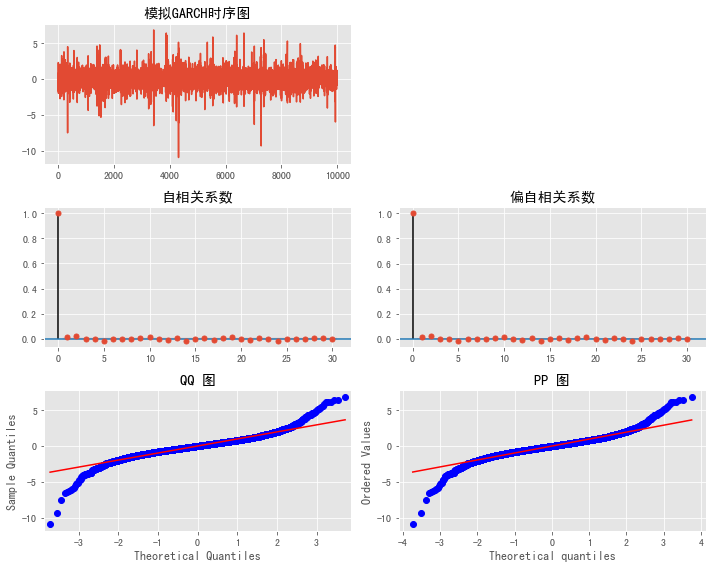

In [15]:
# 模拟GARCH(1, 1) 过程
np.random.seed(1)
a0 = 0.2
a1 = 0.5
b1 = 0.3
n = 10000
w = np.random.normal(size=n)
garch = np.zeros_like(w)
sigsq = np.zeros_like(w)
for i in range(1, n):
    sigsq[i] = a0 + a1*(garch[i-1]**2) + b1*sigsq[i-1]
    garch[i] = w[i] * np.sqrt(sigsq[i])
_ = ts_plot(garch, lags=30,title='模拟GARCH')

In [16]:
# 使用模拟的数据进行 GARCH(1, 1) 模型拟合
#arch_model默认建立GARCH（1,1）模型
am = arch_model(garch)
res = am.fit(update_freq=0)

print(res.summary())


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 12199.134540521049
            Iterations: 14
            Function evaluations: 94
            Gradient evaluations: 14
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -12199.1
Distribution:                  Normal   AIC:                           24406.3
Method:            Maximum Likelihood   BIC:                           24435.1
                                        No. Observations:                10000
Date:                Mon, May 25 2020   Df Residuals:                     9996
Time:                        21:17:00   Df Model:                            4
                                  Mean Model                                  

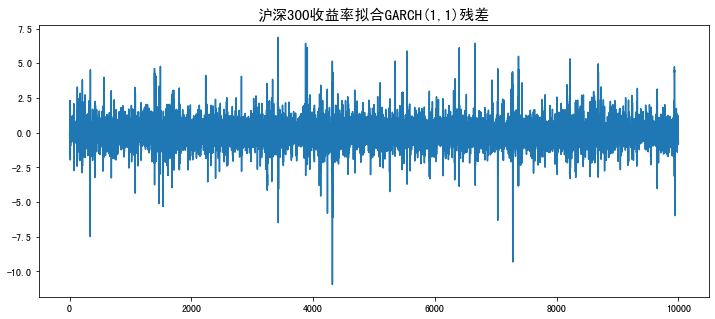

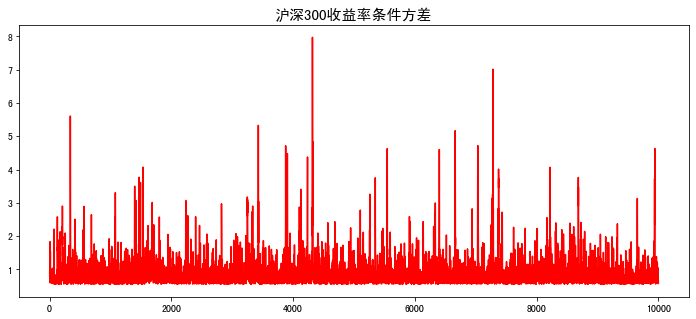

In [20]:
pd.Series(res.resid).plot(figsize=(12,5))
plt.title('沪深300收益率拟合GARCH(1,1)残差',size=15)
plt.show()
pd.Series(res.conditional_volatility).plot(figsize=(12,5),color='r')
plt.title('沪深300收益率条件方差',size=15)
plt.show()

本文简要介绍了ARCH和GARCH模型的基本原理和Python实现，关于其应用还有待进一步拓展和挖掘。ARCH和GARCH模型能够较好的刻画金融资产收益率的波动性聚集和厚尾现象，因此在量化投资上的应用主要表现在波动率的估计上，尤其是金融工程（期权波动率）和风险管理（VaR模型）的应用上。同时，我们也注意到，ARCH和GARCH模型在应用中也存在一定的局限性和不足：首先，模型假定波动是对称的，即过去的波动对现在条件方差的影响是相同的，但学术上的实证结果却表明，当坏（好）消息发布时，股票收益率的波动会增加（减小）；其次，模型对参数的限制条件较强，尤其是高阶模型，参数需要满足的约束非常复杂。最后，模型并没有提供关于波动率变化的更进一步解释，而仅仅是拟合波动率变化的统计行为。针对现有模型的不足，学者们在GARCH模型的基础上又提出了一系列模型，简称GARCH模型族，包括IGARCH、TGARCH、EGARCH等，更复杂的还有BEKK-GARCH、Coupla-GARCH等模型。当然，模型并非越复杂越好，特别地，学术上用到的复杂模型，在现实的量化投资中能用到的往往很少。